# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load .env enviroment variables
load_dotenv("Keys/.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
BTC_amount = 1.2
Eth_amount = 5.3 

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_url = btc_url + "?format=json"
btc_response = requests.get(btc_url)
btc_data = btc_response.json()
btc_data

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 19298212,
   'total_supply': 19298212,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 24368.0,
     'volume_24h': 40528218038,
     'market_cap': 470315422999,
     'percentage_change_1h': 0.537535342649777,
     'percentage_change_24h': -1.34467170771652,
     'percentage_change_7d': 11.7376531638133,
     'percent_change_1h': 0.537535342649777,
     'percent_change_24h': -1.34467170771652,
     'percent_change_7d': 11.7376531638133}},
   'last_updated': 1677020978}},
 'metadata': {'timestamp': 1677020978,
  'num_cryptocurrencies': 3119,
  'error': None}}

In [6]:
# Fetch current ETH price
eth_url = eth_url + "?format=json"
eth_response = requests.get(eth_url)
eth_data = eth_response.json()
eth_data


{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 120490090,
   'total_supply': 120490090,
   'max_supply': 120490090,
   'quotes': {'USD': {'price': 1652.58,
     'volume_24h': 9663047104,
     'market_cap': 199115052147,
     'percentage_change_1h': 0.54235353476043,
     'percentage_change_24h': -2.40652474442156,
     'percentage_change_7d': 9.66659295737363,
     'percent_change_1h': 0.54235353476043,
     'percent_change_24h': -2.40652474442156,
     'percent_change_7d': 9.66659295737363}},
   'last_updated': 1677020965}},
 'metadata': {'timestamp': 1677020965,
  'num_cryptocurrencies': 3119,
  'error': None}}

In [7]:
# Fetch current BTC price
eth_response_data = requests.get(eth_url).json()
eth_response_data

# Fetch current ETH price
btc_response_data = requests.get(btc_url).json()
btc_price = btc_response_data['data']['1']['quotes']['USD']['price']

eth_response_data = requests.get(btc_url).json()
eth_response_data = eth_response_data['data']['1']['quotes']['USD']['price']


# Print current crypto wallet balance
#print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
#print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [9]:
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_api_key


'PKDVFGK4ZNLURT6KQK03'

In [10]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [11]:
# Format current date as ISO format
today = pd.Timestamp("2023-02-01", tz="America/New_York").isoformat()



In [12]:
# Set the tickers
tickers = ["AGG", "SPY"]



In [13]:
 # Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"



In [14]:
# Get current closing prices for SPY and AGG
closing_prices = pd.Timestamp("2021-08-04", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-08-04", tz="America/New_York").isoformat()



In [15]:
# Get current closing prices for SPY and AGG
initial_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Display sample data
initial_df

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2023-02-01 05:00:00+00:00,100.190,100.78,99.86,100.68,11593364,40470,100.349930,AGG
2023-02-01 05:00:00+00:00,405.211,413.67,402.35,410.80,101480517,833884,407.864239,SPY


In [16]:
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
agg_df = initial_df[initial_df['symbol']=='AGG'].drop('symbol', axis=1)
spy_df = initial_df[initial_df['symbol']=='SPY'].drop('symbol', axis=1)




In [17]:
#syntax to create a variable- to the left the variable name to the right variable value 
agg_closing = agg_df["close"].values[0]
spy_closing = spy_df["close"].values[0]

In [18]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_closing}")
print(f"Current SPY closing price: ${spy_closing}")

Current AGG closing price: $100.68
Current SPY closing price: $410.8


In [19]:
my_agg_value = my_agg * agg_closing


In [20]:
my_spy_value = my_spy * spy_closing

In [21]:
# Compute the current value of shares
 

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20540.00
The current value of your 200 AGG shares is $20136.00


### Savings Health Analysis

In [25]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_value = btc_url + eth_url
shares_value = my_spy_value + my_agg_value


# Create savings DataFrame
indexes = ['Crypto', 'Shares']
value_data = [crypto_value, shares_value]

df_savings = pd.DataFrame(value_data, index=indexes)
df_savings.columns = ['Amount']

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,https://api.alternative.me/v2/ticker/Bitcoin/?...
Shares,40676.0


In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:

df_savings.plot.pie(x=0,y=0)

TypeError: '<' not supported between instances of 'str' and 'int'

In [28]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_value + shares_value

# Validate saving health
if total_savings > emergency_fund:
    print("You have enough. Great!")
elif total_savings == emergency_fund:
    print("Congrats on reaching this financial goal.")
else:
    difference = emergency_fund - total_savings
    print(f"You are {difference} away from reaching your goal.")

TypeError: can only concatenate str (not "numpy.float64") to str

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [29]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [32]:
# Get 5 years' worth of historical data for SPY and AGG
monte_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
display(monte_df.head())
display(monte_df.tail())


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([agg_monte_df, monte_df], axis=1, keys=['AGG', 'spy_close_price'])
df_stock_data.index = df_stock_data.index.date
df_stock_data.index.name = 'Date'

# Display sample data
df_stock_data.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2016-05-02 04:00:00+00:00,110.74,110.7400,110.5200,110.605,3553939,15119,110.627199,AGG
2016-05-03 04:00:00+00:00,110.89,110.9450,110.7500,110.810,3044940,15662,110.865995,AGG
2016-05-04 04:00:00+00:00,110.91,110.9315,110.7595,110.860,2920608,13982,110.879063,AGG
2016-05-05 04:00:00+00:00,110.92,111.1600,110.8010,111.140,3008142,15707,111.028363,AGG
2016-05-06 04:00:00+00:00,111.12,111.1200,110.9700,110.970,2718710,12697,111.031967,AGG


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2021-04-26 04:00:00+00:00,417.44,418.22,416.8111,417.61,51824860,295870,417.508245,SPY
2021-04-27 04:00:00+00:00,417.93,418.14,416.3000,417.52,50297139,296300,417.481360,SPY
2021-04-28 04:00:00+00:00,417.81,419.01,416.9000,417.40,50692781,330049,417.742098,SPY
2021-04-29 04:00:00+00:00,420.32,420.72,416.4400,420.06,76965583,443396,418.824046,SPY
2021-04-30 04:00:00+00:00,417.63,418.54,416.3400,417.30,84731942,478844,417.651995,SPY


AGG                                                    \
              open      high       low    close   volume trade_count   
Date                                                                   
2016-05-02  110.74  110.7400  110.5200  110.605  3553939       15119   
2016-05-03  110.89  110.9450  110.7500  110.810  3044940       15662   
2016-05-04  110.91  110.9315  110.7595  110.860  2920608       13982   
2016-05-05  110.92  111.1600  110.8010  111.140  3008142       15707   
2016-05-06  111.12  111.1200  110.9700  110.970  2718710       12697   

                              spy_close_price                               \
                  vwap symbol            open      high       low    close   
Date                                                                         
2016-05-02  110.627199    AGG          110.74  110.7400  110.5200  110.605   
2016-05-03  110.865995    AGG          110.89  110.9450  110.7500  110.810   
2016-05-04  110.879063    AGG          110.91  110.9315  110.7595  110.860   
2016-05-05  111.028363    AGG          110.92  111.1600  110.8010  111.140   
2016-05-06  111.031967    AGG          111.12  111.1200  110.9700  110.970   

                                                    
             volume trade_count        vwap symbol  
Date                                                
2016-05-02  3553939       15119  110.627199    AGG  
2016-05-03  3044940       15662  110.865995    AGG  
2016-05-04  2920608       13982  110.879063    AGG  
2016-05-05  3008142       15707  111.028363    AGG  
2016-05-06  2718710       12697  111.031967    AGG

In [34]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MCS = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [35]:
# Printing the simulation input data
print(MCS)

In [36]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MCS.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994572,1.018748,0.999286,1.001713,0.986766,1.027410,0.987810,0.993273,1.016101,1.016847,...,0.986693,0.982056,0.993126,1.009790,1.010402,1.005722,0.999587,0.998585,0.990170,0.999516
2,0.972211,1.009971,0.999403,1.005292,0.984603,1.021438,0.992406,1.002385,0.994671,1.011146,...,0.985335,0.952474,1.019319,1.007971,1.000121,1.007712,1.009720,0.987424,0.977373,1.019837
3,0.955106,1.008260,0.985975,1.017610,0.995744,1.017268,1.008715,1.010278,0.999235,1.025842,...,0.992982,0.956301,1.028411,1.011360,0.999392,1.006620,1.001461,0.962588,0.987296,1.035345
4,0.965152,1.011038,0.983627,1.005447,1.002558,1.026122,1.007791,1.002701,0.994110,1.016173,...,0.991936,0.967309,1.000336,0.990295,0.998114,1.008950,0.997012,0.947324,0.981398,1.051626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.777953,75.150467,91.459019,15.430225,42.289056,81.880978,65.140619,41.636474,37.236288,14.483414,...,17.898994,22.394595,64.555160,25.034682,24.139027,558.272346,187.303929,42.625871,46.048386,50.349269
7557,11.576089,73.568392,89.479426,15.232358,42.515983,80.384514,64.538423,43.166518,37.423912,14.478923,...,17.920251,22.321431,64.636253,25.282408,24.175529,557.704877,189.921503,42.548033,45.608374,49.296858
7558,11.822894,72.980210,89.913195,15.199449,43.589705,78.781432,65.050614,43.160589,37.245629,14.513533,...,17.900317,22.254215,65.640804,25.571048,24.728403,554.413888,189.306833,42.121908,45.045065,50.281794
7559,11.641812,73.366594,90.917304,15.287056,44.473251,77.565647,65.390996,43.579174,36.915056,14.527444,...,18.283436,22.248341,64.930968,25.116508,24.383399,563.337875,192.434014,42.137925,44.753684,50.821176


<AxesSubplot: title={'center': 'Simulated Outcomes'}>

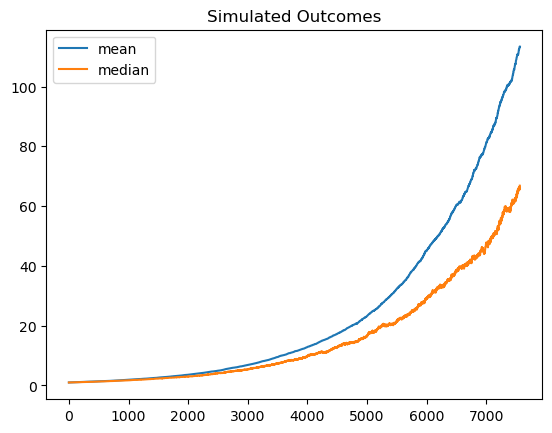

In [37]:
# Plot simulation outcomes
simulated_returns_data = {
    "mean": list(MCS.simulated_return.mean(axis=1)),
    "median": list(MCS.simulated_return.median(axis=1)),
}

simulated_returns_df = pd.DataFrame(simulated_returns_data)
simulated_returns_df[['mean', 'median']].plot(title="Simulated Outcomes")

<AxesSubplot: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

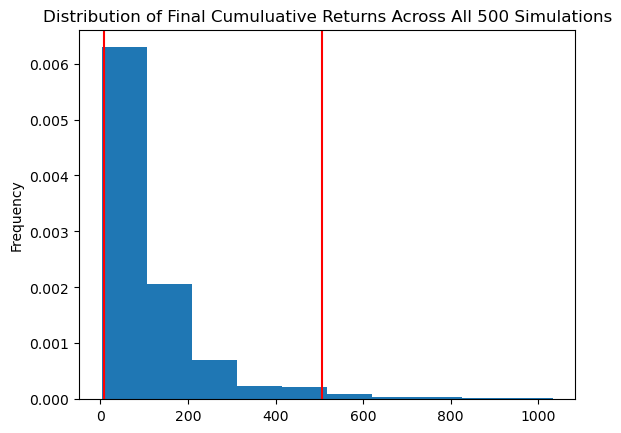

In [38]:
# Plot probability distribution and confidence interval
MCS.plot_distribution()

### Retirement Analysis

In [39]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MCS.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count            500.000000
mean             113.384553
std              133.643894
min                2.880224
25%               32.631578
50%               66.832936
75%              141.841987
max             1032.885439
95% CI Lower       7.134927
95% CI Upper     505.581380
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [40]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $142698.54 and $10111627.6


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [41]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $142698.54 and $10111627.6
